<a href="https://colab.research.google.com/github/Aman12457/Upgradation/blob/main/SLR_Practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('height-weight.csv')

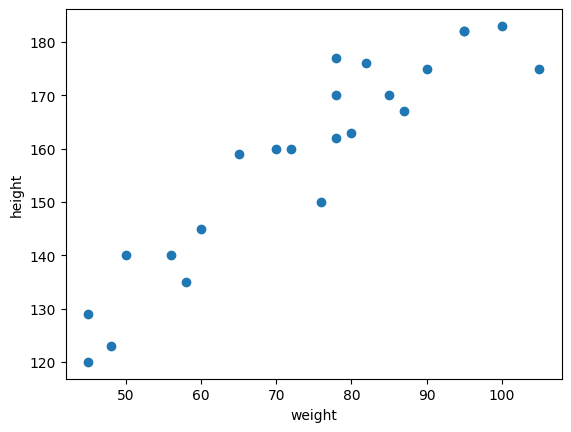

In [49]:
## scatter plot
plt.scatter(df['Weight'] ,df['Height'])
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

In [50]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [51]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


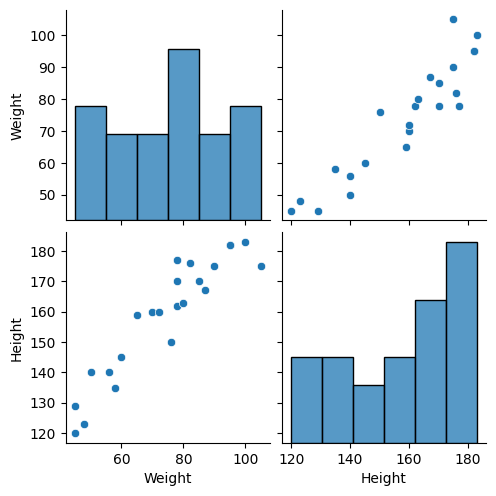

In [52]:
import seaborn as sns
sns.pairplot(df)

In [53]:
## diving features into independent and dependent
X = df[['Weight']] ## independent feature should be of the form dataframe or 2D array.
y= df['Height'] ## dependent feature can be in series form or 1D array.

In [54]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [55]:
X_train.shape

(17, 1)

In [56]:
## standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [57]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [58]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr.fit(X_train , y_train)

LinearRegression()

In [59]:
## w1
Lr.coef_

array([17.2982057])

In [60]:
## w0
Lr.intercept_

np.float64(156.47058823529412)

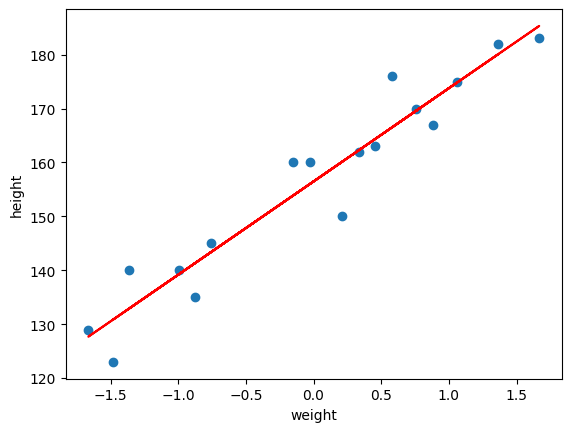

In [61]:
## plot
plt.scatter(X_train,y_train)
plt.plot(X_train,Lr.predict(X_train),color='red')
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

In [62]:
y_pred = Lr.predict(X_test)

In [63]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

9.66512588679501
114.84069295228699


In [64]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

In [65]:
print(rmse)

10.716374991212605


In [66]:
## R2 score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7360826717981276

In [67]:
## OLS Linear regression
import statsmodels.api as sm

In [68]:
model = sm.OLS(y_train,X_train).fit()

In [69]:
predict = model.predict(X_test)

In [70]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sun, 07 Sep 2025   Prob (F-statistic):                       0.664
Time:                        08:37:55   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [71]:
## Prediction for new_data
Lr.predict(sc.transform([[72]]))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])